# Practical Assignment 7  

### Image Adhikari
#### Computer Engineering
#### Roll No.: 02

## Reinforcement Learning

Reinforcement learning refers to the process of learning what to do and mapping situations to certain actions in order to maximize the reward. In most paradigms of machine learning, a learning agent is told what actions to take in order to achieve certain results. In the case of reinforcement leaning, the learning agent is not told what actions to take. Instead, it must
discover what actions yield the highest reward by trying them out. These actions tend to affect the immediate reward as well as the next situation. This means that all the subsequent rewards will be affected too.

A good way to think about reinforcement learning is by understanding that we are defining a learning problem and not a learning method. So we can say that any method that can solve our problem can be considered as a reinforcement learning method.  Reinforcement learning is characterized by two distinguishing features — trial and error learning, and delayed reward. A reinforcement learning agent uses these two features to learn from the consequences of its actions.

### Building blocks of reinforcement learning

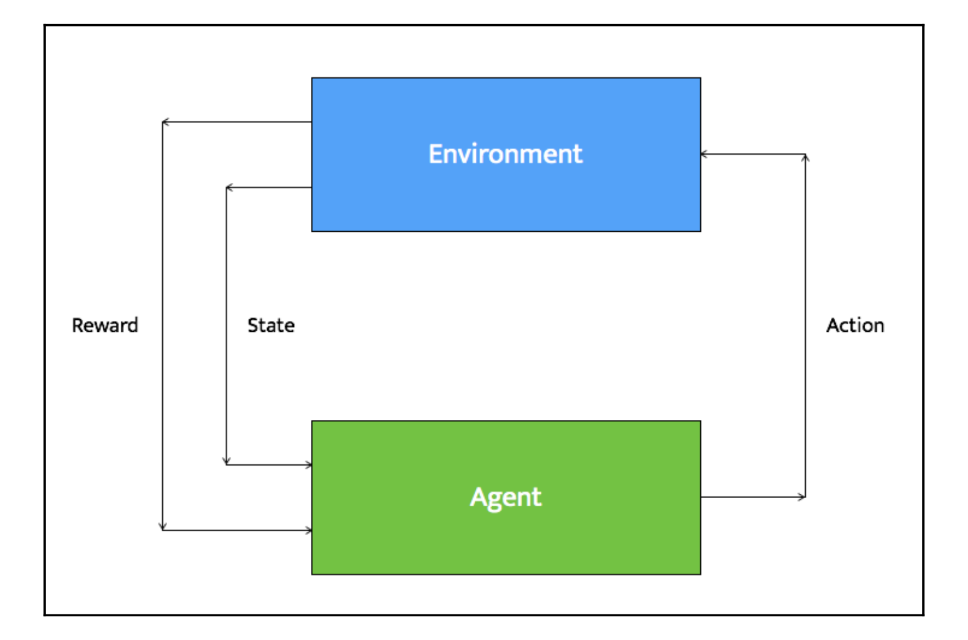

In [1]:
from IPython.display import Image
Image("data/reinforcement.png")

## Creating an environment

In [4]:
import argparse
import gym

In [2]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Run an environment')
    parser.add_argument('--input-env', dest='input_env', required=True,
            choices=['cartpole', 'mountaincar', 'pendulum', 'taxi', 'lake'], 
            help='Specify the name of the environment')
    return parser

In [3]:
# if __name__=='__main__':
#     args = build_arg_parser().parse_args()
#     input_env = args.input_env
def main(input_env):
    name_map = {'cartpole': 'CartPole-v0', 
                'mountaincar': 'MountainCar-v0',
                'pendulum': 'Pendulum-v0',
                'taxi': 'Taxi-v1',
                'lake': 'FrozenLake-v0'}

    # Create the environment and reset it
    env = gym.make(name_map[input_env])
    env.reset()

    # Iterate 1000 times
    for _ in range(1000):
        # Render the environment
        env.render()

        # take a random action
        env.step(env.action_space.sample()) 

In [4]:
main("cartpole")

C:\Users\Image\anaconda3\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
C:\Users\Image\anaconda3\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\Image\anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\Image\anaconda3\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initializatio

In [5]:
main("mountaincar")

## Building a learning agent

In [5]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Run an environment')
    parser.add_argument('--input-env', dest='input_env', required=True,
            choices=['cartpole', 'mountaincar', 'pendulum'], 
            help='Specify the name of the environment')
    return parser

In [6]:
# if __name__=='__main__':
#     args = build_arg_parser().parse_args()
#     input_env = args.input_env
def main(input_env):
    name_map = {'cartpole': 'CartPole-v0', 
                'mountaincar': 'MountainCar-v0',
                'pendulum': 'Pendulum-v0'}

    # Create the environment 
    env = gym.make(name_map[input_env])

    # Start iterating 
    for _ in range(20):
        # Reset the environment
        observation = env.reset()

        # Iterate 100 times
        for i in range(100):
            # Render the environment
            env.render()

            # Print the current observation
            print(observation)

            # Take action 
            action = env.action_space.sample()

            # Extract the observation, reward, status and 
            # other info based on the action taken
            observation, reward, done, info = env.step(action)
            
            # Check if it's done
            if done:
                print('Episode finished after {} timesteps'.format(i+1))
                break

In [7]:
main("cartpole")

C:\Users\Image\anaconda3\lib\site-packages\gym\envs\registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
C:\Users\Image\anaconda3\lib\site-packages\gym\core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\Image\anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\Image\anaconda3\lib\site-packages\gym\core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initializatio

[-0.00862837  0.02951692 -0.03542591  0.04596501]
[-0.00803803  0.22512847 -0.03450661 -0.25768128]
[-0.00353546  0.03051572 -0.03966023  0.02392116]
[-0.00292515 -0.16401568 -0.03918181  0.30383176]
[-0.00620546  0.03164212 -0.03310518 -0.0009462 ]
[-0.00557262 -0.1629898  -0.0331241   0.28111055]
[-0.00883241  0.0325886  -0.02750189 -0.02183281]
[-0.00818064 -0.16212837 -0.02793854  0.26204765]
[-0.01142321 -0.3568406  -0.02269759  0.5457892 ]
[-0.01856002 -0.1614072  -0.01178181  0.24604206]
[-0.02178817 -0.35635892 -0.00686097  0.53498554]
[-0.02891535 -0.16114117  0.00383875  0.24014872]
[-0.03213817  0.03392574  0.00864172 -0.05132089]
[-0.03145965  0.22892271  0.0076153  -0.3412648 ]
[-0.0268812   0.03369325  0.00079001 -0.04619022]
[-2.6207333e-02  2.2880386e-01 -1.3379802e-04 -3.3862379e-01]
[-0.02163126  0.03368382 -0.00690627 -0.04598305]
[-0.02095758 -0.16133842 -0.00782594  0.2445129 ]
[-0.02418435  0.03389442 -0.00293568 -0.05062821]
[-0.02350646 -0.16118531 -0.00394824  

[ 0.12714514  0.06057919 -0.14899488 -0.26219797]
[ 0.12835672 -0.13213667 -0.15423883 -0.01996951]
[ 0.12571399  0.06482218 -0.15463823 -0.3570672 ]
[ 0.12701043 -0.12780201 -0.16177957 -0.11686135]
[ 0.12445439 -0.32028082 -0.1641168   0.12073084]
[ 0.11804877 -0.12323442 -0.16170219 -0.21890123]
[ 0.11558408 -0.31572    -0.1660802   0.01872703]
[ 0.10926969 -0.508119   -0.16570567  0.25475106]
[ 0.0991073  -0.31106657 -0.16061065 -0.08527359]
[ 0.09288597 -0.11405045 -0.16231611 -0.4240111 ]
[ 0.09060497  0.08295388 -0.17079633 -0.763145  ]
[ 0.09226404  0.27996492 -0.18605924 -1.1043321 ]
[ 0.09786334  0.47698066 -0.20814589 -1.4491415 ]
Episode finished after 39 timesteps
[ 0.04028349 -0.02178516  0.03786289 -0.00311244]
[ 0.03984778  0.17277391  0.03780065 -0.28361285]
[ 0.04330326 -0.02286624  0.03212839  0.02074848]
[ 0.04284594 -0.21843386  0.03254336  0.32339266]
[ 0.03847726 -0.02379006  0.03901121  0.04114759]
[ 0.03800146 -0.21944907  0.03983416  0.34587923]
[ 0.03361248 -

[-0.02958653  0.37250912 -0.12628314 -0.92605454]
[-0.02213635  0.17929794 -0.14480424 -0.67557424]
[-0.01855039 -0.01354666 -0.15831572 -0.4317586 ]
[-0.01882133  0.18342113 -0.1669509  -0.76986605]
[-0.0151529   0.38039905 -0.18234822 -1.1100807 ]
[-0.00754492  0.1880794  -0.20454983 -0.8796978 ]
Episode finished after 26 timesteps
[0.0406111  0.01893    0.01103688 0.01041015]
[ 0.0409897   0.21389194  0.01124509 -0.27877018]
[ 0.04526754  0.40885168  0.00566968 -0.56788534]
[ 0.05344458  0.21365066 -0.00568802 -0.27342162]
[ 0.05771759  0.01861033 -0.01115645  0.01746188]
[ 0.0580898  -0.17634986 -0.01080722  0.30660403]
[ 0.0545628  -0.37131616 -0.00467514  0.59585917]
[ 0.04713647 -0.17612909  0.00724205  0.30170727]
[ 0.04361389 -0.3713535   0.01327619  0.5966653 ]
[ 0.03618682 -0.56665874  0.0252095   0.8935004 ]
[ 0.02485365 -0.76211333  0.04307951  1.194     ]
[ 0.00961138 -0.5675749   0.06695951  0.9151246 ]
[-0.00174012 -0.76353544  0.085262    1.228078  ]
[-0.01701082 -0.56

## Example code for q-learning

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from random import randint

In [11]:
# defines the reward/link connection graph
# CHANGED THE np.array FROM EXAMPLE TO np.matrix TO MAKE IT WORK
R = np.matrix([[-1, -1, -1, -1, 0, -1],
              [-1, -1, -1, 0, -1, 100],
              [-1, -1, -1, 0, -1, -1],
              [-1, 0, 0, -1, 0, -1],
              [ 0, -1, -1, 0, -1, 100],
              [-1, 0, -1, -1, 0, 100]]).astype("float32")
Q = np.zeros_like(R)

In [12]:
# learning parameter
gamma = 0.8

# Initialize random_state
initial_state = randint(0,4)

In [13]:
# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [14]:
# This function chooses at random which action to be performed within the range of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [15]:
# This function updates the Q matrix according to the path selected and the Q-learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value

In [16]:
# Get available actions in the current state
available_act = available_actions(initial_state)

# Sample next action to be performed
action = sample_next_action(available_act)

In [17]:
for i in range(100):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

In [18]:
# Normalize the "trained" Q matrix
print ("Trained Q matrix: \n", Q/np.max(Q)*100)

Trained Q matrix: 
 [[  0.           0.           0.           0.          80.00000119
    0.        ]
 [  0.           0.           0.          52.43113041   0.
   81.92364573]
 [  0.           0.           0.          63.99999857   0.
    0.        ]
 [  0.          65.53891897  51.20000243   0.          80.00000119
    0.        ]
 [ 63.99999857   0.           0.          63.99999857   0.
  100.        ]
 [  0.          49.62396026   0.           0.          80.00000119
  100.        ]]


In [19]:
# Testing
current_state = 2
steps = [current_state]
while current_state != 5:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

In [20]:
# Print selected sequence of steps
print ("Best sequence path: ", steps)

Best sequence path:  [2, 3, 4, 5]
